# 라이브러리 불러오기

In [1]:
# pandas 불러오기
import pandas as pd

In [2]:
import FinanceDataReader as fdr

# 상장종목 목록 가져오기

In [4]:
# 불러올 종가의 목록
stock_dict = {
    '삼성전자':'005930',
    'SK하이닉스':'000660',
    '현대차':'005380',
    '셀트리온':'068270',
    'LG화학':'051910',
    'POSCO':'005490',
    '삼성물산':'028260',
    'NAVER':'035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [5]:
# stock_dict 변수 타입
type(stock_dict)

dict

In [6]:
# key
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [8]:
# value
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

# 여러 종목의 종가 수집

In [12]:
# 반복문을 사용하여 여러 종목의 종가 수집하기 

item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code,"2020","2022")['Close']
    item_list.append(close)

In [14]:
len(item_list)

8

In [19]:
df = pd.concat(item_list, axis=1)
df.columns= stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,55200,94700,118000,173489,314000,236000,107500,182500
2020-01-03,55500,94500,116000,171079,311000,237000,107500,181500
2020-01-06,55500,94300,116000,166742,307000,231000,106000,180500
2020-01-07,55800,94000,115500,171561,311000,232000,108000,187000
2020-01-08,56800,97400,112000,166742,302000,228000,105000,183000
...,...,...,...,...,...,...,...,...
2021-12-24,80500,128000,215500,197278,621000,284000,117000,384000
2021-12-27,80200,126000,213500,200222,627000,281500,117000,380500
2021-12-28,80300,127500,214000,212000,632000,283500,118000,384500


## 하나의 데이터프레임으로 합치기

## 시각화를 위한 폰트 설정

In [ ]:
font_family = "AppleGothic"

In [21]:
import matplotlib.pyplot as plt

In [24]:
plt.rc("font",family=font_family)

In [28]:
plt.rc("axes", unicode_minus=False)

<AxesSubplot:title={'center':'한글폰트'}>

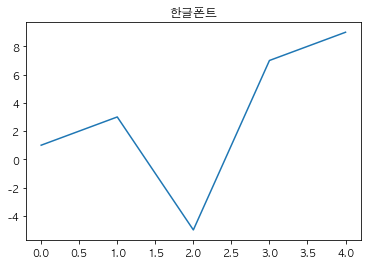

In [29]:
pd.Series([1,3,-5,7,9]).plot(title="한글폰트")

# 여러 종목 한번에 시각화하기

<AxesSubplot:xlabel='Date'>

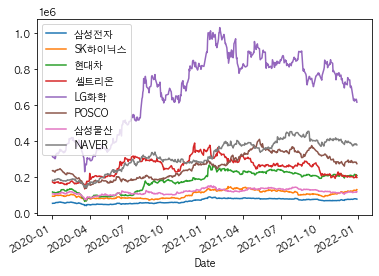

In [32]:
# 전체 데이터 프레임 시각화
df.plot()

# 2축 그래프 사용하기

<AxesSubplot:xlabel='Date'>

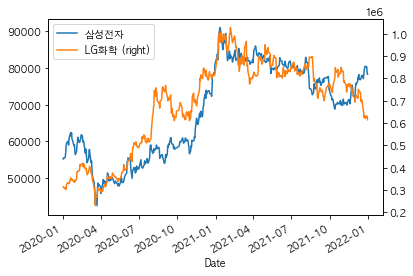

In [35]:
df[["삼성전자","LG화학"]].plot(secondary_y="LG화학")

# 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값 구하기
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있음
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법 사용하기

* 표준화 
** 데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로 변환
** (Z-score 표준화) : (측정값-0평균)/ 표준편차
* 정규화
** 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
** (측정값-최솟값)/(최대값-최솟값)


In [41]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져오기
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률 구할 수 있음
# df_plot에 수익률 담기
df2 = df[["LG화학","삼성전자"]]
df_plot = df2 / df2.iloc[0] - 1

<AxesSubplot:xlabel='Date'>

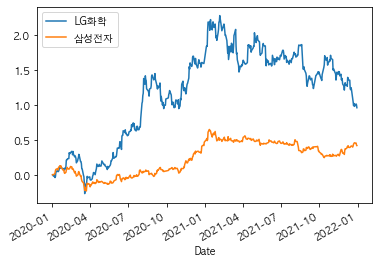

In [42]:
# 수익률 시각화 하기
df_plot.plot()

# pyplot의 subplots로 서브플롯 그리기

<AxesSubplot:title={'center':'수익률 그래프'}, xlabel='Date'>

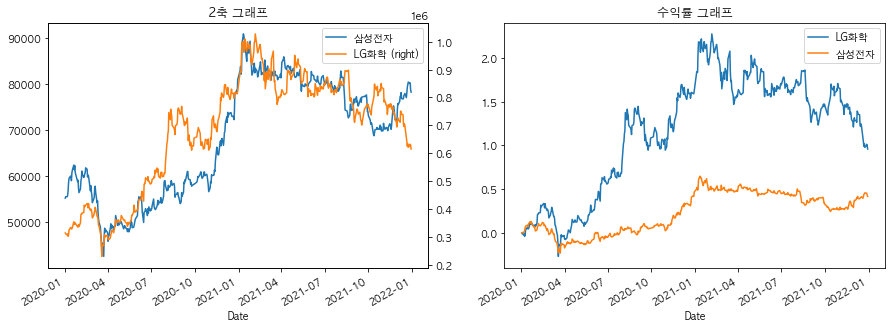

In [46]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해보기
fig, axes = plt.subplots(1, 2, figsize=(15,5))

df[["삼성전자","LG화학"]].plot(secondary_y="LG화학", ax=axes[0], title="2축 그래프")
df_plot.plot(ax=axes[1], title="수익률 그래프")

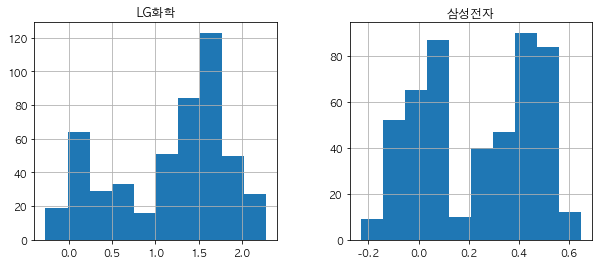

In [49]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화하기
h = df_plot.hist(figsize=(10,4))

# 전체 데이터프레임 값에 대한 수익률 계산

In [54]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률 구할 수 있음
# df_norm
df_norm = df / df.iloc[0] - 1
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.005435,-0.002112,-0.016949,-0.013891,-0.009554,0.004237,0.000000,-0.005479
2020-01-06,0.005435,-0.004224,-0.016949,-0.038890,-0.022293,-0.021186,-0.013953,-0.010959
2020-01-07,0.010870,-0.007392,-0.021186,-0.011113,-0.009554,-0.016949,0.004651,0.024658
2020-01-08,0.028986,0.028511,-0.050847,-0.038890,-0.038217,-0.033898,-0.023256,0.002740
...,...,...,...,...,...,...,...,...
2021-12-24,0.458333,0.351637,0.826271,0.137121,0.977707,0.203390,0.088372,1.104110
2021-12-27,0.452899,0.330517,0.809322,0.154090,0.996815,0.192797,0.088372,1.084932
2021-12-28,0.454710,0.346357,0.813559,0.221979,1.012739,0.201271,0.097674,1.106849


## 전체 종목의 수익률 시각화

<AxesSubplot:xlabel='Date'>

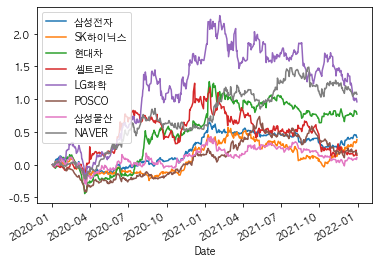

In [55]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률 시각화 하기
df_norm.plot()

In [56]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.234682,0.109195,0.515956,0.471581,1.164408,0.105774,0.110600,0.741322
std,0.227555,0.212784,0.447159,0.302338,0.654539,0.282268,0.135847,0.465638
min,-0.230072,-0.271383,-0.441525,-0.222227,-0.267516,-0.415254,-0.306977,-0.216438
25%,0.028986,-0.109029,0.054025,0.196520,0.619427,-0.169492,0.013953,0.479452
50%,0.278080,0.087645,0.641949,0.518990,1.364650,0.130297,0.104651,0.724658
75%,0.451087,0.298838,0.894068,0.688885,1.649682,0.364407,0.224419,1.137671
max,0.648551,0.568110,1.266949,1.241658,2.273885,0.735169,0.427907,1.487671


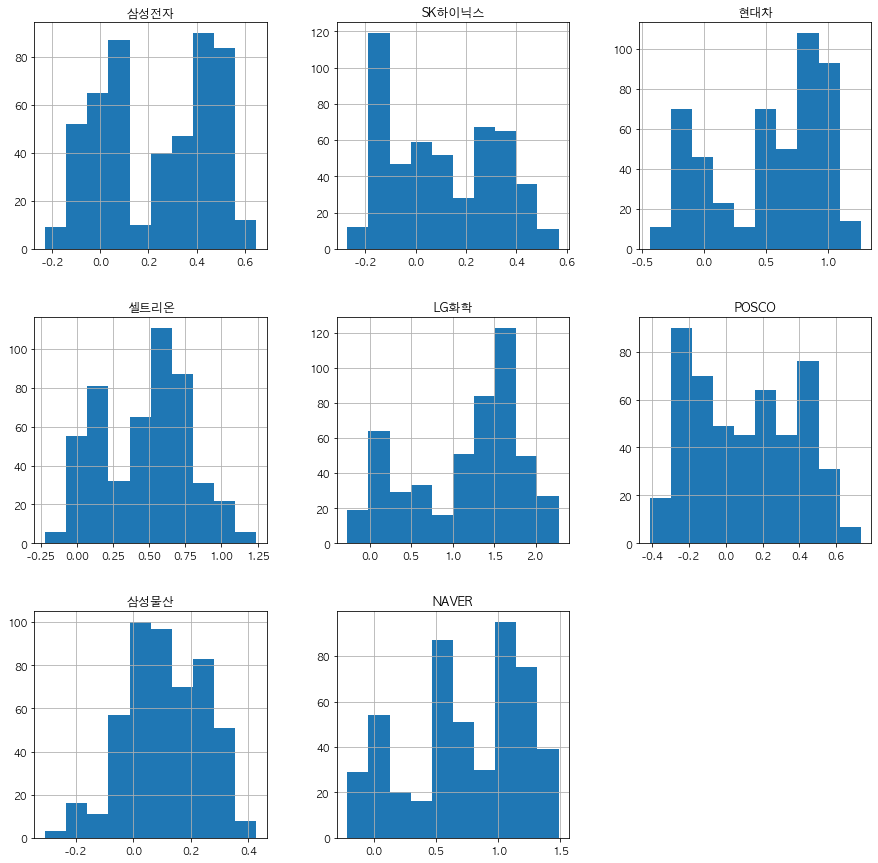

In [60]:
# 수익률에 대한 히스토그램 그리기
g = df_norm.hist(figsize=(15,15))

# 왜도와 첨도

## 왜도

In [62]:
df_norm.skew()

삼성전자     -0.155322
SK하이닉스    0.202131
현대차      -0.486367
셀트리온     -0.128376
LG화학     -0.552247
POSCO     0.132533
삼성물산     -0.163335
NAVER    -0.383458
dtype: float64

## 첨도

In [63]:
df_norm.kurt()

삼성전자     -1.421050
SK하이닉스   -1.295668
현대차      -1.157005
셀트리온     -0.782181
LG화학     -0.967429
POSCO    -1.257642
삼성물산     -0.330930
NAVER    -1.012174
dtype: float64